In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 강서_데이터 생성 및 파생변수 생성

In [64]:
강서_데이터 = pd.read_csv('../../../../data_semi/강서_따릉이_데이터.csv', encoding='utf-8')
강서_데이터['기준_날짜'] = pd.to_datetime(강서_데이터['기준_날짜'])
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리
0,2023-04-03,25,ST-2551,ST-2551,1,1,88
1,2023-04-03,35,ST-1506,ST-1506,1,1,111
2,2023-04-03,755,ST-1351,ST-1351,1,1,88
3,2023-04-03,830,ST-525,ST-525,1,1,40
4,2023-04-03,850,ST-1506,ST-1506,1,1,111
...,...,...,...,...,...,...,...
3496962,2024-03-29,2350,ST-2888,ST-2034,1,4,520
3496963,2024-03-29,2350,ST-2965,ST-828,1,3,800
3496964,2024-03-29,2350,ST-831,ST-3129,1,3,480
3496965,2024-03-29,2355,ST-2886,ST-2789,1,4,958


In [65]:
강서_데이터.info(verbose=True, null_counts=True)

/var/folders/_j/yl1g13yd0_s25zcx_fwnjdkm0000gn/T/ipykernel_1293/772194109.py:1: FutureWarning:

null_counts is deprecated. Use show_counts instead



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3496967 entries, 0 to 3496966
Data columns (total 7 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   기준_날짜      3496967 non-null  datetime64[ns]
 1   기준_시간대     3496967 non-null  int64         
 2   시작_대여소_ID  3496967 non-null  object        
 3   종료_대여소_ID  3496967 non-null  object        
 4   전체_건수      3496967 non-null  int64         
 5   전체_이용_분    3496967 non-null  int64         
 6   전체_이용_거리   3496967 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 186.8+ MB


년, 월, 일 기준 파생변수 생성

In [66]:
강서_데이터['year'] = 강서_데이터['기준_날짜'].dt.year
강서_데이터['month'] = 강서_데이터['기준_날짜'].dt.month
강서_데이터['day'] = 강서_데이터['기준_날짜'].dt.day
강서_데이터['dayofweek'] = 강서_데이터['기준_날짜'].dt.dayofweek 
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,year,month,day,dayofweek
0,2023-04-03,25,ST-2551,ST-2551,1,1,88,2023,4,3,0
1,2023-04-03,35,ST-1506,ST-1506,1,1,111,2023,4,3,0
2,2023-04-03,755,ST-1351,ST-1351,1,1,88,2023,4,3,0
3,2023-04-03,830,ST-525,ST-525,1,1,40,2023,4,3,0
4,2023-04-03,850,ST-1506,ST-1506,1,1,111,2023,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...
3496962,2024-03-29,2350,ST-2888,ST-2034,1,4,520,2024,3,29,4
3496963,2024-03-29,2350,ST-2965,ST-828,1,3,800,2024,3,29,4
3496964,2024-03-29,2350,ST-831,ST-3129,1,3,480,2024,3,29,4
3496965,2024-03-29,2355,ST-2886,ST-2789,1,4,958,2024,3,29,4


강서구 이용량 카테고리 별 변수 저장

In [67]:
# 한시간 단위 구간 설정 후 변수 저장 

def divide_time_range1(time):
    for hour in range(24):
        if time < (hour + 1) * 100:
            return f'{hour:02d}:00~{(hour + 1):02d}:00'

강서_데이터['한시간_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range1)

# 시간대 구간별로 건수 합산
강서_시간대별_건수2 = 강서_데이터.groupby('한시간_구간')['전체_건수'].sum().reset_index()
강서_시간대별_건수2

,한시간_구간,전체_건수
0,00:00~01:00,50273
1,01:00~02:00,29765
2,02:00~03:00,18457
3,03:00~04:00,12609
4,04:00~05:00,14405
5,05:00~06:00,39365
6,06:00~07:00,115045
7,07:00~08:00,271975
8,08:00~09:00,392094
9,09:00~10:00,162121


In [68]:
# 출퇴근 시간별 컬럼 생성 후 변수에 저장 

def divide_time_range(time):
    if time < 600:
        return '00:00~06:00'
    elif time < 1000:
        return '06:00~10:00' # 출근시간
    elif time < 1600:
        return '10:00~17:00'
    elif time < 2000:
        return '17:00~21:00' # 퇴근시간
    else:
        return '20:00~24:00'
    
강서_데이터['시간대_구간'] = 강서_데이터['기준_시간대'].apply(divide_time_range)

# 시간대 구간별로 건수 합산
강서_시간대별_건수 = 강서_데이터.groupby('시간대_구간')['전체_건수'].sum().reset_index()
강서_시간대별_건수

,시간대_구간,전체_건수
0,00:00~06:00,164874
1,06:00~10:00,941235
2,10:00~17:00,763526
3,17:00~21:00,1212856
4,20:00~24:00,630511


In [69]:
# 숫자를 한글 요일명으로 매핑
숫자_한글_요일_매핑 = {
    0 : '월',
    1 : '화',
    2 : '수',
    3 : '목',
    4 : '금',
    5 : '토',
    6 : '일'
}

# 요일 순서 정의
요일_순서 = ['월', '화', '수', '목', '금']

# '요일' 열의 값을 한글 요일명으로 변환
강서_데이터['dayofweek'] = 강서_데이터['dayofweek'].map(숫자_한글_요일_매핑)
강서_데이터

,기준_날짜,기준_시간대,시작_대여소_ID,종료_대여소_ID,전체_건수,전체_이용_분,전체_이용_거리,year,month,day,dayofweek,한시간_구간,시간대_구간
0,2023-04-03,25,ST-2551,ST-2551,1,1,88,2023,4,3,월,00:00~01:00,00:00~06:00
1,2023-04-03,35,ST-1506,ST-1506,1,1,111,2023,4,3,월,00:00~01:00,00:00~06:00
2,2023-04-03,755,ST-1351,ST-1351,1,1,88,2023,4,3,월,07:00~08:00,06:00~10:00
3,2023-04-03,830,ST-525,ST-525,1,1,40,2023,4,3,월,08:00~09:00,06:00~10:00
4,2023-04-03,850,ST-1506,ST-1506,1,1,111,2023,4,3,월,08:00~09:00,06:00~10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3496962,2024-03-29,2350,ST-2888,ST-2034,1,4,520,2024,3,29,금,23:00~24:00,20:00~24:00
3496963,2024-03-29,2350,ST-2965,ST-828,1,3,800,2024,3,29,금,23:00~24:00,20:00~24:00
3496964,2024-03-29,2350,ST-831,ST-3129,1,3,480,2024,3,29,금,23:00~24:00,20:00~24:00
3496965,2024-03-29,2355,ST-2886,ST-2789,1,4,958,2024,3,29,금,23:00~24:00,20:00~24:00


In [74]:
# 계절 별 컬럼 생성 후 변수에 저장 

def divide_season_range(month):
    if month >= 3 and month <= 5:
        return 'spring'
    elif month >= 6 and month <= 8:
        return 'summer' 
    elif month >= 9 and month <= 11:
        return 'fall'
    else:
        return 'winter'
    
강서_데이터['season'] = 강서_데이터['month'].apply(divide_season_range)
계절_순서 = ['spring', 'summer', 'fall', 'winter']

# 시간대 구간별로 건수 합산
강서_계절별_건수 = 강서_데이터.groupby('season')['전체_건수'].sum().reset_index()
강서_계절별_건수

,season,전체_건수
0,fall,1105416
1,spring,954867
2,summer,1102624
3,winter,550095


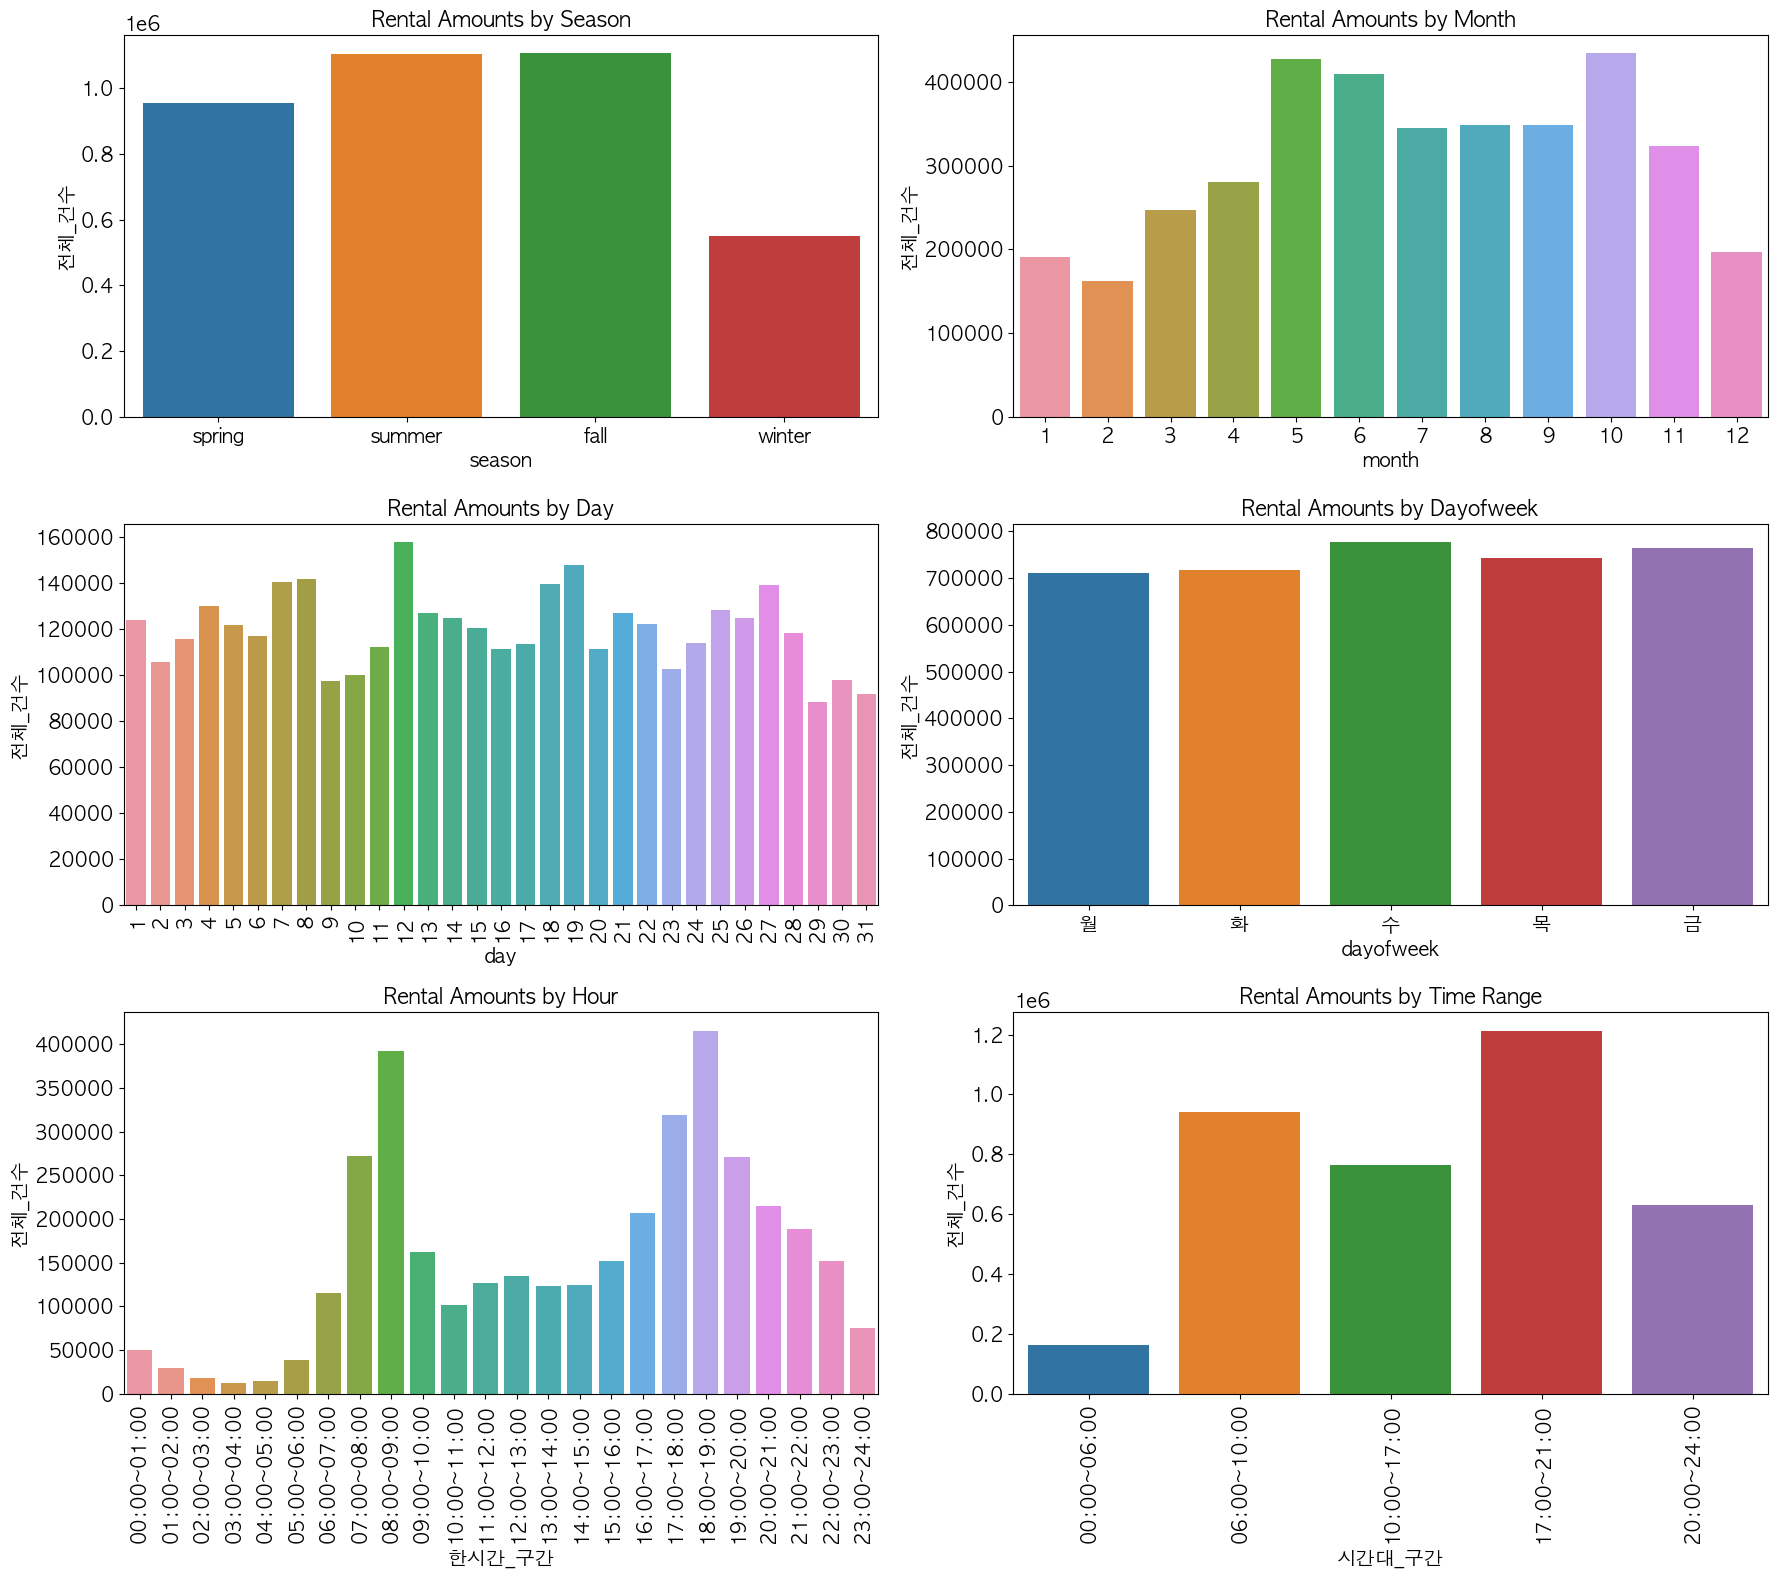

In [75]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

# 맥 OS 폰트 깨짐 방지 코드
from matplotlib import rc
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2행 2열의 subplots 준비
mpl.rc('font', size=14)
mpl.rc('axes', titlesize=15) 
figure, axes = plt.subplots(nrows=3, ncols=2, figsize=(18, 16)) 

# subplots 할당 
sns.barplot(x='season', y='전체_건수', data=강서_계절별_건수, ax=axes[0, 0], order= 계절_순서)
sns.barplot(x='month', y='전체_건수', data=강서_데이터.groupby('month').sum().reset_index(), ax=axes[0, 1])
sns.barplot(x='day', y='전체_건수', data=강서_데이터.groupby('day').sum().reset_index(), ax=axes[1, 0])
sns.barplot(x='dayofweek', y='전체_건수', data=강서_데이터.groupby('dayofweek').sum().reset_index(), ax=axes[1, 1], order= 요일_순서)
sns.barplot(x='한시간_구간', y='전체_건수', data=강서_시간대별_건수2, ax=axes[2, 0])
sns.barplot(x='시간대_구간', y='전체_건수', data=강서_시간대별_건수, ax=axes[2, 1])

# subplots 이름 정해주기
axes[0, 0].set(title='Rental Amounts by Season')
axes[0, 1].set(title='Rental Amounts by Month')
axes[1, 0].set(title='Rental Amounts by Day')
axes[1, 1].set(title='Rental Amounts by Dayofweek')
axes[2, 0].set(title='Rental Amounts by Hour')
axes[2, 1].set(title='Rental Amounts by Time Range')

# x축 회전
axes[1, 0].tick_params(axis='x', labelrotation=90)
axes[2, 0].tick_params(axis='x', labelrotation=90)
axes[2, 1].tick_params(axis='x', labelrotation=90)

# 출력
plt.tight_layout() 
plt.show()


* 한 시간 단위, 시간대 구간 단위의 차이는 유의미함. 

* 날짜 별 차이는 현재 주말 수치가 빠져 있기 때문에 어느정도 유의미한지 파악하기 어려움 

* 요일 별 차이는 주말, 공휴일까지 포함해서 진행해야 의미를 파악할 수 있을 듯 
    + 평일 중 공휴일은 뺀건가?

* Season으로 범주화 기준을 온도를 기준으로 해서 다시 설정해서 봐도 괜찮을 것


In [33]:
# 시간대별 >> plotly 적용

import plotly.express as px

fig = px.bar(강서_시간대별_건수2, x='한시간_구간', y='전체_건수', 
             title='시간대별 따릉이 확인', 
             labels={'대여 건수': '대여 건수', 'index': '시간'})
fig.update_layout(xaxis_title='시간', yaxis_title='대여 건수', height=800)
fig.update_xaxes(tickangle=90)

fig.show()


In [42]:
# 구간_시간대별 >> plotly 적용

import plotly.express as px

fig = px.bar(강서_시간대별_건수, x='시간대_구간', y='전체_건수', 
             title='구간 시간대별 따릉이 확인', 
             labels={'대여 건수': '대여 건수', 'index': '시간'})
fig.update_layout(xaxis_title='시간 구간', yaxis_title='대여 건수', height=800)
fig.update_xaxes(tickangle=90)

fig.show()

## 강서구 대여소 쏠림현상 확인

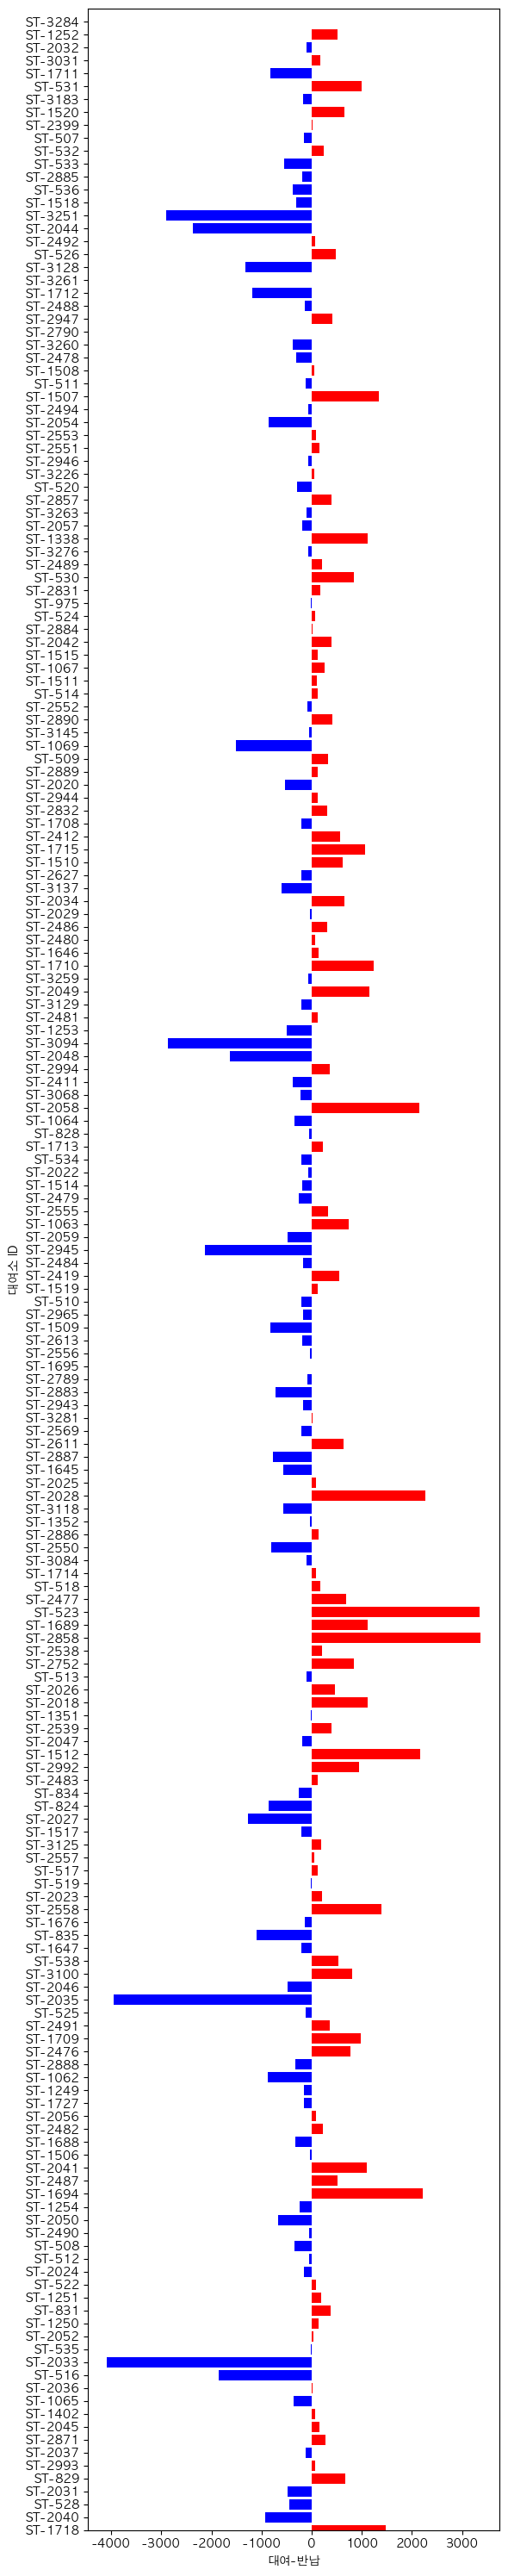

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
# font_path = 'C:\\Windows\\Fonts\\gulim.ttc'
# font = fm.FontProperties(fname=font_path).get_name()
# mpl.rc('font', family=font)

# 강서 대여소 ID 정보 불러옴
강서_대여소_ID = pd.read_csv('../../Data/따릉이/강서_따릉이_대여소_ID.csv',encoding='utf-8')

# 강서 대여소 이용 현황 정보 불러옴
# 강서_데이터 = pd.read_csv('../../Data/따릉이/강서_따릉이_데이터_01.csv',encoding='utf-8')

# 시작 대여소별 전체 횟수 계산(1년 동안 해당 대여소에서 대여한 총량)
시작대여소별_전체횟수 = 강서_데이터.groupby('시작_대여소_ID')['전체_건수'].sum()

# 종료 대여소별 전체 횟수 계산(1년 동안 해당 대여소에서 반납한 총량)
종료대여소별_전체횟수 = 강서_데이터.groupby('종료_대여소_ID')['전체_건수'].sum()

# 강서구에 위치한 대여소 ID 리스트업
len(강서_데이터['시작_대여소_ID'].unique())
# 강서구_대여소_ID_list == '강서구에 위치한 대여소 ID 리스트'로 변수 지정
강서_대여소_ID_list= 강서_데이터['시작_대여소_ID'].unique()

# 대여소 ID를 인덱스로 가지는 시작횟수 리스트 생성
temp_list = []
for i in range(len(강서_대여소_ID_list)):
    temp_list.append(시작대여소별_전체횟수[강서_대여소_ID_list[i]])

# start_count == 대여소 ID를 인덱스로 가지는 시작횟수 리스트로 시리즈 변수 생성
start_count = temp_list.copy()

# 대여소 ID를 인덱스로 가지는 종료횟수 리스트 생성
temp_list2 = []
for i in range(len(강서_대여소_ID_list)):
    temp_list2.append(종료대여소별_전체횟수[강서_대여소_ID_list[i]])

# end_count == 대여소 ID를 인덱스로 가지는 종료횟수 리스트로 시리즈 변수 생성
end_count = temp_list2.copy()

# 강서_대여소_정보 DataFrame 생성
# column = ['대여소_ID', '대여건수', '반납건수']
강서_대여소_정보 = {'대여소_ID' : 강서_대여소_ID_list, '대여건수' : start_count, '반납건수' : end_count}
강서_대여소_정보 = pd.DataFrame(강서_대여소_정보)

# '대여-반납' column 생성 >> 쏠림 현상 유무 확인 기준 지표
강서_대여소_정보['대여-반납'] = 강서_대여소_정보['대여건수'] - 강서_대여소_정보['반납건수']


# '대여-반납'값 : x축 / 대여소_ID : y축 을 가지는 그래프 생성
import matplotlib.font_manager as fm

colors = ['red' if val > 0 else 'blue' for val in 강서_대여소_정보['대여-반납']]
fig, ax = plt.subplots(figsize=(6,30))

plt.barh(강서_대여소_정보['대여소_ID'], 강서_대여소_정보['대여-반납'], color = colors )
# plt.xticks(rotation=90)
plt.ylabel('대여소 ID')
plt.xlabel('대여-반납')
plt.ylim(0, 195)


plt.tight_layout()
plt.show()

# 해당 그래프 분석을 통한 쏠림 현상 발생 대여소 선별 예정

## 기상 데이터와 강서구 따릉이 이용량 상관관계 분석

### 기상 데이터 EDA
* 기온
* 강수량
* 대기질

기온

In [102]:
import numpy as np
import pandas as pd

data3 = pd.read_csv('../../Data/기상청/기온.csv',encoding='cp949')
data3['일시'] = pd.to_datetime(data3['일시'])
data3

,지점,지점명,일시,평균기온(°C),최저기온(°C),최고기온(°C)
0,108,서울,2023-04-01,17.5,9.4,25.6
1,108,서울,2023-04-02,18.8,11.9,25.2
2,108,서울,2023-04-03,19.0,11.3,25.9
3,108,서울,2023-04-04,17.6,12.7,21.7
4,108,서울,2023-04-05,11.9,8.7,14.9
...,...,...,...,...,...,...
361,108,서울,2024-03-27,10.4,4.4,16.2
362,108,서울,2024-03-28,10.3,7.8,12.2
363,108,서울,2024-03-29,7.6,5.0,12.3
364,108,서울,2024-03-30,8.8,3.0,15.6


In [101]:
data3['일시'] = pd.to_datetime(data3['일시'])
열이름 = ['지점명', '기준_날짜','평균_기온','최고_기온', '최저_기온']
기온 = data3[['지점명', '일시', '평균기온(°C)', '최고기온(°C)', '최저기온(°C)']]
기온.columns = 열이름 
print(기온)

    지점명      기준_날짜  평균_기온  최고_기온  최저_기온
0    서울 2023-04-01   17.5   25.6    9.4
1    서울 2023-04-02   18.8   25.2   11.9
2    서울 2023-04-03   19.0   25.9   11.3
3    서울 2023-04-04   17.6   21.7   12.7
4    서울 2023-04-05   11.9   14.9    8.7
..   ..        ...    ...    ...    ...
361  서울 2024-03-27   10.4   16.2    4.4
362  서울 2024-03-28   10.3   12.2    7.8
363  서울 2024-03-29    7.6   12.3    5.0
364  서울 2024-03-30    8.8   15.6    3.0
365  서울 2024-03-31   10.6   17.7    3.4

[366 rows x 5 columns]


In [104]:
기온['기준_날짜'].nunique()

366

강수량

In [95]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def categorize_value(value):
    if pd.isna(value):
        return 0
    if value < 5:
        return 5
    elif value < 10:
        return 10
    elif value < 20:
        return 20
    elif value < 30:
        return 30
    elif value < 50:
        return 50
    elif value < 80:
        return 80
    else:
        return 100


data4 = pd.read_csv('../../Data/기상청/강수량.csv')
# data4["강수량"] = data4['강수량(mm)'].apply(categorize_value)
# data4['날짜'] = pd.to_datetime(data4['날짜'])
# precipi = data4["강수량"]
# date = data4['날짜'] 

data4

,지점,지점명,일시,일강수량(mm)
0,108,서울,2023-04-04,6.9
1,108,서울,2023-04-05,50.3
2,108,서울,2023-04-06,2.7
3,108,서울,2023-04-11,2.9
4,108,서울,2023-04-13,0.0
...,...,...,...,...
159,108,서울,2024-03-23,0.1
160,108,서울,2024-03-25,5.1
161,108,서울,2024-03-26,11.5
162,108,서울,2024-03-28,1.9


In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def categorize_value(value):
    if pd.isna(value):
        return 0
    if value < 5:
        return 5
    elif value < 10:
        return 10
    elif value < 20:
        return 20
    elif value < 30:
        return 30
    elif value < 50:
        return 50
    elif value < 80:
        return 80
    else:
        return 100


data4 = pd.read_csv('../../Data/기상청/강수량.csv',skiprows=7)
data4["강수량"] = data4['강수량(mm)'].apply(categorize_value)
data4['날짜'] = pd.to_datetime(data4['날짜'])
precipi = data4["강수량"]
date = data4['날짜']


### plot

bottomspace = 3

fig, ax = plt.subplots(figsize=(12, 4))


ax.set_ylim(-bottomspace, 100)
ax.bar(date, precipi+bottomspace, align='edge', bottom = -bottomspace)


ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=15, interval=1))


ax.tick_params(axis='x', rotation=45)
ax.grid(axis='y')


#ax.set_xlim(date.iloc[0], date.iloc[-1])
# ax.set_xlim('tight')
plt.show()

KeyError: '강수량(mm)'

대기질

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 대기질 데이터 불러오기
data5 = pd.read_csv('../../Data/기상청/대기질.csv') 
data5

,지점,지점명,일시,일 미세먼지 농도(㎍/㎥)
0,108,서울,2023-04-01,88
1,108,서울,2023-04-02,52
2,108,서울,2023-04-03,52
3,108,서울,2023-04-04,32
4,108,서울,2023-04-06,63
...,...,...,...,...
338,108,서울,2024-03-24,40
339,108,서울,2024-03-28,25
340,108,서울,2024-03-29,277
341,108,서울,2024-03-30,104


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 대기질 데이터 불러오기
data5 = pd.read_csv('../../Data/기상청/미세먼지.csv')

# 서울시 전체 >> 강서구 데이터
미세먼지_강서구_data = data5[data5['측정소명']=='강서구']
미세먼지_강서구_data = 미세먼지_강서구_data.rename(columns={'측정일시': '기준_날짜'})
미세먼지 = 미세먼지_강서구_data[['기준_날짜','미세먼지(㎍/㎥)', '초미세먼지(㎍/㎥)']].reset_index(drop=True)

# 기준 날짜 type 변경 >> datetime
미세먼지['기준_날짜'] = (미세먼지['기준_날짜'].astype(str).str[0:4]) + '-' + (미세먼지['기준_날짜'].astype(str).str[4:6]) + '-' + (미세먼지['기준_날짜'].astype(str).str[6:8])
미세먼지['기준_날짜'] = pd.to_datetime(미세먼지['기준_날짜'])

print('미세먼지')
print(미세먼지)

미세먼지
         기준_날짜  미세먼지(㎍/㎥)  초미세먼지(㎍/㎥)
0   2023-01-01       62.0        38.0
1   2023-01-02       32.0        11.0
2   2023-01-03       37.0        16.0
3   2023-01-04       48.0        26.0
4   2023-01-05       66.0        38.0
..         ...        ...         ...
360 2023-12-27       88.0        55.0
361 2023-12-28       58.0        37.0
362 2023-12-29       46.0        29.0
363 2023-12-30       40.0        28.0
364 2023-12-31       26.0        17.0

[365 rows x 3 columns]


In [ ]:
미세먼지.describe()

,미세먼지(㎍/㎥),초미세먼지(㎍/㎥)
count,365.000000,365.000000
mean,42.134247,19.235616
std,30.551543,12.974376
min,5.000000,1.000000
25%,23.000000,11.000000
50%,34.000000,16.000000
75%,51.000000,24.000000
max,286.000000,87.000000


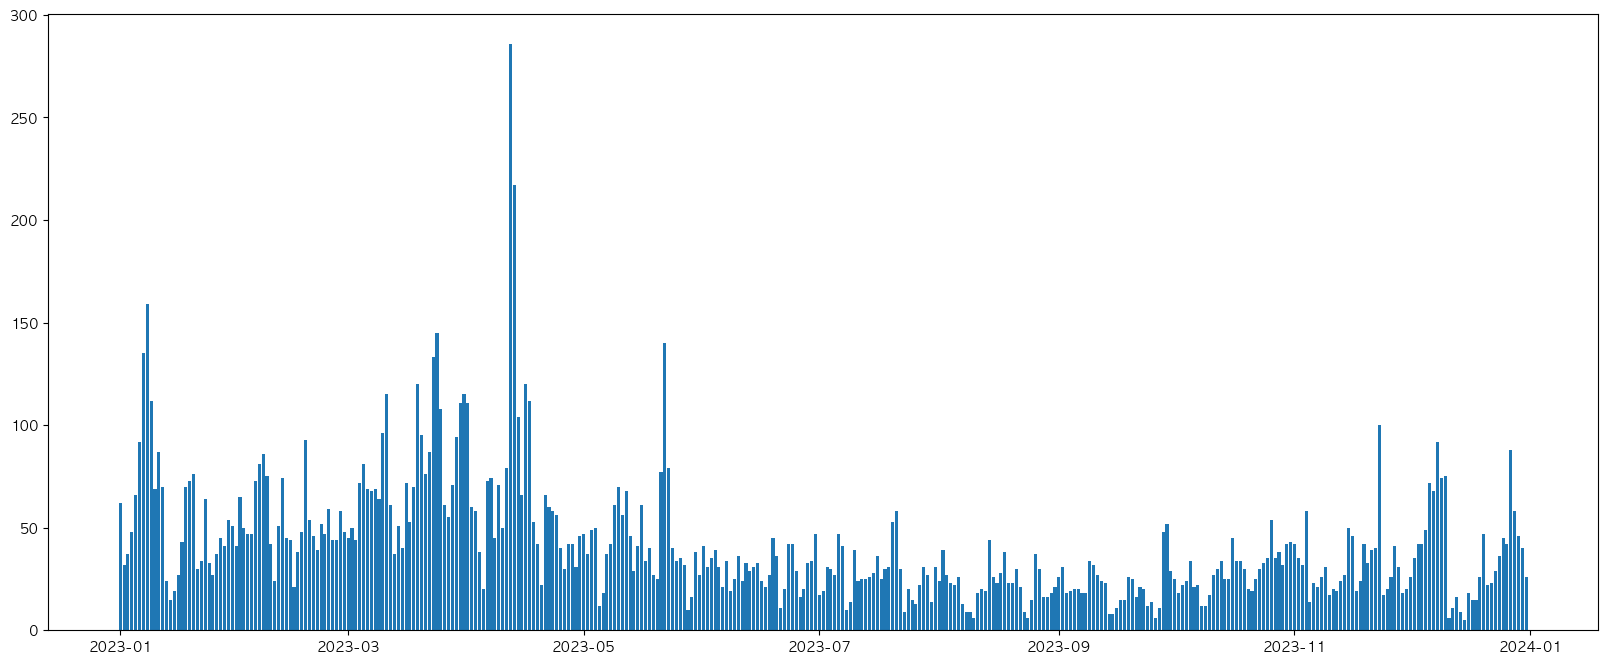

In [ ]:
# 바 그래프

fig, ax = plt.subplots(figsize = (20, 8))

ax.bar(미세먼지['기준_날짜'], 미세먼지['미세먼지(㎍/㎥)'], label = '미세먼지')
# ax.bar(미세먼지['기준_날짜'], 미세먼지['초미세먼지(㎍/㎥)'], label = '초미세먼지')

plt.show()